In [78]:
## Import key Projects

## for data handling
import pandas as pd
import numpy as np 
from skimpy import skim
from scipy.stats import skew
from scipy.stats import kurtosis as krt
# from summarytools import dfSummary

# for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.display import display


In [2]:
## Information of the dataset

df = pd.read_csv('SampleSuperstore.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Observation
- we could see that the features and its data type, along with Null count
- We have zero null-count in our dataset
- DataType table below

| Data Type |Features|
|:----------:|:-----------:|
|int64(Continuous) | Postal Code, Quantity | 
|float64(Continuous) | Sales, Discount, Profit|
|object(Categorical) | Ship Mode, Segment, Country, City, State, Region, Category, Sub-Category |

In [49]:
## Data Cleaning/ Wrangling 

## 1. Unique values in features with object datatype
obj_name = ['Ship Mode','Segment','Country','Region','Category','Sub-Category']
num_name = ['Quantity','Sales','Discount','Profit']

unique_values = lambda  :[ print("Unique count in ",obj_name[i]," is ",len(df[obj_name[i]].unique())," and values: ",df[obj_name[i]].unique(),". \n") for i in range(len(obj_name))]

unique_values()
print("Unique values in Postal Code is :" , len(df['Postal Code'].unique()))
print("Unique values in City is :" , len(df['City'].unique()))
print("Unique values in State is :" , len(df['State'].unique()))

Unique count in  Ship Mode  is  4  and values:  ['Second Class' 'Standard Class' 'First Class' 'Same Day'] . 

Unique count in  Segment  is  3  and values:  ['Consumer' 'Corporate' 'Home Office'] . 

Unique count in  Country  is  1  and values:  ['United States'] . 

Unique count in  Region  is  4  and values:  ['South' 'West' 'Central' 'East'] . 

Unique count in  Category  is  3  and values:  ['Furniture' 'Office Supplies' 'Technology'] . 

Unique count in  Sub-Category  is  17  and values:  ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers'] . 

Unique values in Postal Code is : 631
Unique values in City is : 531
Unique values in State is : 49


### Observation
- As Store Manager 
  - We have orders from __**1 country, 531 cites,with 631 postal code and 49 states  with all 4 region, with 3 main category and 17 sub-category to 3 main segments placed with 4 different ship modes**__.

In [44]:
## Summary of Statics

## Using skimpy for quick view of summary 
skim(df)

df.describe().round(2)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 9994   │ │ object      │ 8     │                                    │
│ │ Number of columns │ 13     │ │ float64     │ 3     │                                    │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃         ┃ missing ┃ complet ┃ mean  ┃ sd    ┃ p0    ┃ p25   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┃         ┃         ┃ e rate  ┃       ┃       ┃       ┃       ┃       ┃       ┃        ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Postal  │       0 │       1 │ 55000 │ 32000 │  1000 │ 23000 │ 90000 │ 99000 │ ▄▅▄▂▄█ │  │
│ │ Code    │         │         │       │       │       │       │       │       │        │  │
│ │ Sales   │       0 │       1 │   230 │   620 │  0.44 │    17 │   210 │ 23000 │   █    │  │
│ │ Quantit │       0 │       1 │   3.8 │   2.2 │     1 │     2 │     5 │    14 │  █▃▂▁  │  │
│ │ y       │         │         │       │       │       │       │       │       │        │  │
│ │ Discoun │       0 │       1 │  0.16 │  0.21 │     0 │     0 │   0.2 │   0.8 │ █▆   ▁ │  │
│ │ t       │         │         │       │       │       │       │       │       │        │  │
│ │ Profit  │       0 │       1 │    29 │   230 │ -6600 │   1.7 │    29 │  8400 │    █   │  │
│ └─────────┴─────────┴─────────┴───────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00
mean,55190.38,229.86,3.79,0.16,28.66
std,32063.69,623.25,2.23,0.21,234.26
min,1040.00,0.44,1.00,0.00,-6599.98
25%,23223.00,17.28,2.00,0.00,1.73
50%,56430.50,54.49,3.00,0.20,8.67
75%,90008.00,209.94,5.00,0.20,29.36
max,99301.00,22638.48,14.00,0.80,8399.98


### Observation
- From above summary
    - Sales and Profit contains more outiler than the outiler of Discount and Quantity.
    - There is no null values are present in given data.

In [87]:
# Calculating skewness and kurtosis of Continuous feature(Sales,Quantity,Discount,Profit)

skewness = []
kurtos = []

[skewness.append(skew(df[num_name[i]],bias=True)) for i in range(len(num_name))]

[kurtos.append(krt(df[num_name[i]],bias=True)) for i in range(len(num_name))]

ziped = list(zip(num_name,skewness,kurtos))
df_stat = pd.DataFrame(ziped,columns=['Features','Skewness','Kurtosis'])
df_stat

,Features,Skewness,Kurtosis
0,Quantity,1.278353,1.990293
1,Sales,12.970805,305.158427
2,Discount,1.684042,2.407740
3,Profit,7.560297,396.989229


### Observation
- As basic stats we know
    - if skewness = 0 -> Normal ditribution
    - if skewness > 0 -> Left tail distribution
    - if skewness < 0 -> Right tail distribution

    and

    - if Kurtosis = 3 -> Normal distribution
    - if kurtosis < 3 -> then it's called playkurtic(heavy-tailed)
    - if kurtosis > 3 -> it's called leptokurtic and it tries to produce more outlier rather than normal distribution.

- So, in comparison to other continuour variable `Sales` have **Huge Outlier** and **Heavly Tailed**. 
- **Quatity** is also contain  the hugre **outlier**.

c:\Users\user\.conda\envs\idp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


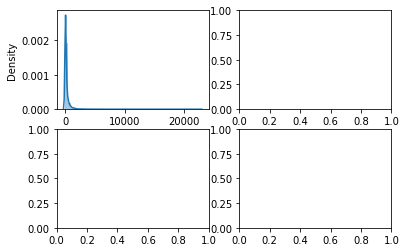

Signature:
sns.distplot(
    a=None,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,
)
Source:   
def distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None,
             hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None,
             color=None, vertical=False, norm_hist=False, axlabel=None,
             label=None, ax=None, x=None):
    """DEPRECATED: Flexibly plot a univariate distribution of observations.

    .. warning::
       This function is deprecated and will be removed in a future version.
       Please adapt your code to use one of two new functions:

       - :func:`displot`, a figure-level function with a similar flexibility
         over the kind of plot to draw
       - :func:`histplot`, an axes-level function for plotting histograms,
    

In [92]:
## Univariate Analysis
## Now we are doing the univariate analysis of our continous data

fig, ax = plt.subplots(2,2)

sns.distplot(df['Sales'],ax=ax[0,0])

sns.distplot??


c:\Users\user\.conda\envs\idp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


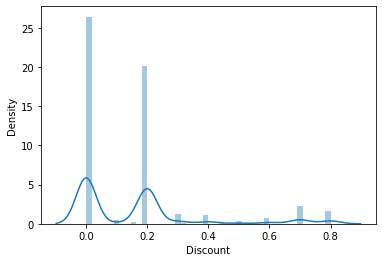

In [89]:
## Univariate Analysis
## Now we are doing the univariate analysis of our continous data

# sns_plot = sns.boxplot(x=df['Sales'])
sns_plot = sns.distplot(df['Discount'])
# sns.pairplot(df)   
# sns_plot = sns.distplot(df['Profit'])j
plt.show()